# Pokemon Stats Visualized

Import the proper libraries and then import the pokedex data from a csv

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# import dataset
pokedex_df = pd.read_csv("pokedex.csv")


## Exploratory Analysis 
We're going to check the head, dimensions, and check for missing values in our dataset. 

In [2]:
# check head and dimensions
print(pokedex_df.head())
print("pokedex dimensions: ", str(pokedex_df.shape))


# check for missing values
print("\n Missing Values by Column: ")
print(pokedex_df.isnull().sum())


   index  pokedex_number           name  generation  status  Fully Evolved  \
0      0               1      Bulbasaur           1  Normal              0   
1      1               2        Ivysaur           1  Normal              0   
2      2               3       Venusaur           1  Normal              1   
3      3               3  Mega Venusaur           1  Normal              1   
4      4               4     Charmander           1  Normal              0   

          species  type_number type_1  type_2  ...  hp  attack  defense  \
0    Seed Pokémon            2  Grass  Poison  ...  45      49       49   
1    Seed Pokémon            2  Grass  Poison  ...  60      62       63   
2    Seed Pokémon            2  Grass  Poison  ...  80      82       83   
3    Seed Pokémon            2  Grass  Poison  ...  80     100      123   
4  Lizard Pokémon            1   Fire     NaN  ...  39      52       43   

  sp_attack sp_defense speed  growth_rate  egg_type_number  egg_type_1  \
0     

There are missing elements in six columns, but all but two of them need corrected. Pokemon will often have only one type (explaining type_2), only one ability (explaining ability_2 and ability_hidden), or only one egg type (explaining egg_type_2). However, each pokemon should have en entry under growth_rate and egg_type_1. We will have to examine those two entries and correct them.

We'll do this by storing every missing value of growth_rate and egg_type in a varaible. Then display those that return true from isnull(). Isnull() checks if the value is missing, or NaN and returns True if it is and false if there is a value. 

In [3]:
missing_growth_rate = pd.isnull(pokedex_df['growth_rate'])
missing_egg_type_1 = pd.isnull(pokedex_df['egg_type_1'])

pokedex_df[missing_growth_rate]
pokedex_df[missing_egg_type_1]

,index,pokedex_number,name,generation,status,Fully Evolved,species,type_number,type_1,type_2,...,hp,attack,defense,sp_attack,sp_defense,speed,growth_rate,egg_type_number,egg_type_1,egg_type_2
650,652,555,Darmanitan Galarian Zen Mode,5,Normal,1,Zen Charm Pokémon,2,Ice,Fire,...,105,160,55,30,55,135,NaN,0,NaN,NaN


Oh! And it turns out that pokemon index number 652 is the culprit on both accounts! Those pesky Darmanitans. 

I'll head over to pokemondb.net and look up this pokemon's egg types and growth rate so that we may update them.

In [4]:
pokedex_df['growth_rate'][650] = 'Medium Slow' # set darmanitan to medium slow
pokedex_df['egg_type_1'][650] = 'Field' # set darmanitan egg type

We'll recheck the dataframe to see if it is updated properly. 

In [5]:
# check for missing values
print("\n Missing Values by Column: ")
print(pokedex_df.isnull().sum())


 Missing Values by Column: 
index                 0
pokedex_number        0
name                  0
generation            0
status                0
Fully Evolved         0
species               0
type_number           0
type_1                0
type_2              483
height_m              0
weight_kg             0
abilities_number      0
ability_1             0
ability_2           511
ability_hidden      216
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
growth_rate           0
egg_type_number       0
egg_type_1            0
egg_type_2          738
dtype: int64


Alright all good. Now, let's explore this pokemon dataset further by visualizating it in a variety of ways!

## Data Visualization
Data visualization can help us quickly answer a variety of questions in a pleasing way. Let's ask a question and then answer it with a slick visualization!

### Which typing has the most pokemon in it?
We can answer this question with a simple bar chart. An important consideration is that pokemon can have more than one type and thus can be counted multiple times. One way to solve that problem is by collapsing our two typings columns into eachother. Remove Nan, then put them in a dictionary and plot. 

In [6]:
temp_df1 = pokedex_df['type_1'] # add type 1 to a temp df
temp_df2 = pokedex_df['type_2'] # add type 2 to a temp df

pokemon_types_df = pd.concat([temp_df1, temp_df2]) # concatenate our temp dfs to a new df

pokemon_types_count = pd.Series(pokemon_types_df).value_counts() # use value_counts() to create a new dict with our counts for each typing
print(pokemon_types_count)

Water       153
Normal      125
Flying      117
Psychic     114
Grass       114
Bug          90
Fire         82
Ground       80
Poison       75
Rock         74
Steel        71
Dragon       71
Dark         70
Electric     70
Fighting     70
Fairy        63
Ghost        63
Ice          55
dtype: int64


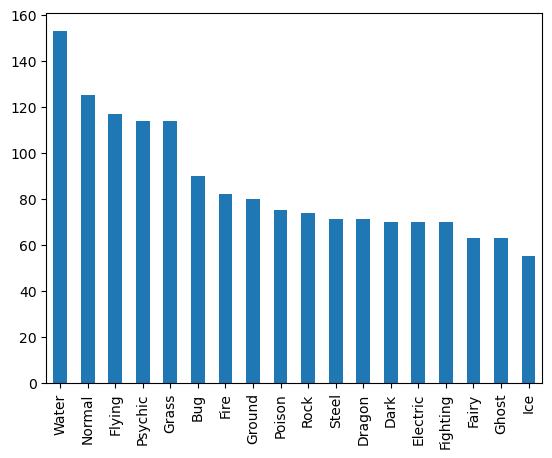

In [7]:
fig_types = pokemon_types_count.plot.bar()

From displaying the series and this bar chart we can see that water has a healthy lead on number of pokemon with that typing! However, a pokemon is often considered to belong to the typing of the primary type! If I asked you your favorite Posion pokemon, you typically wouldn't think of Venusaur! Therefore, we'll maintain our comparisons to type_1 from here on out. 

### Are any of the pokemon stats correlated?
Now that we've taken a look at typings. Let's take a look at stats and display them with a pairplot. 

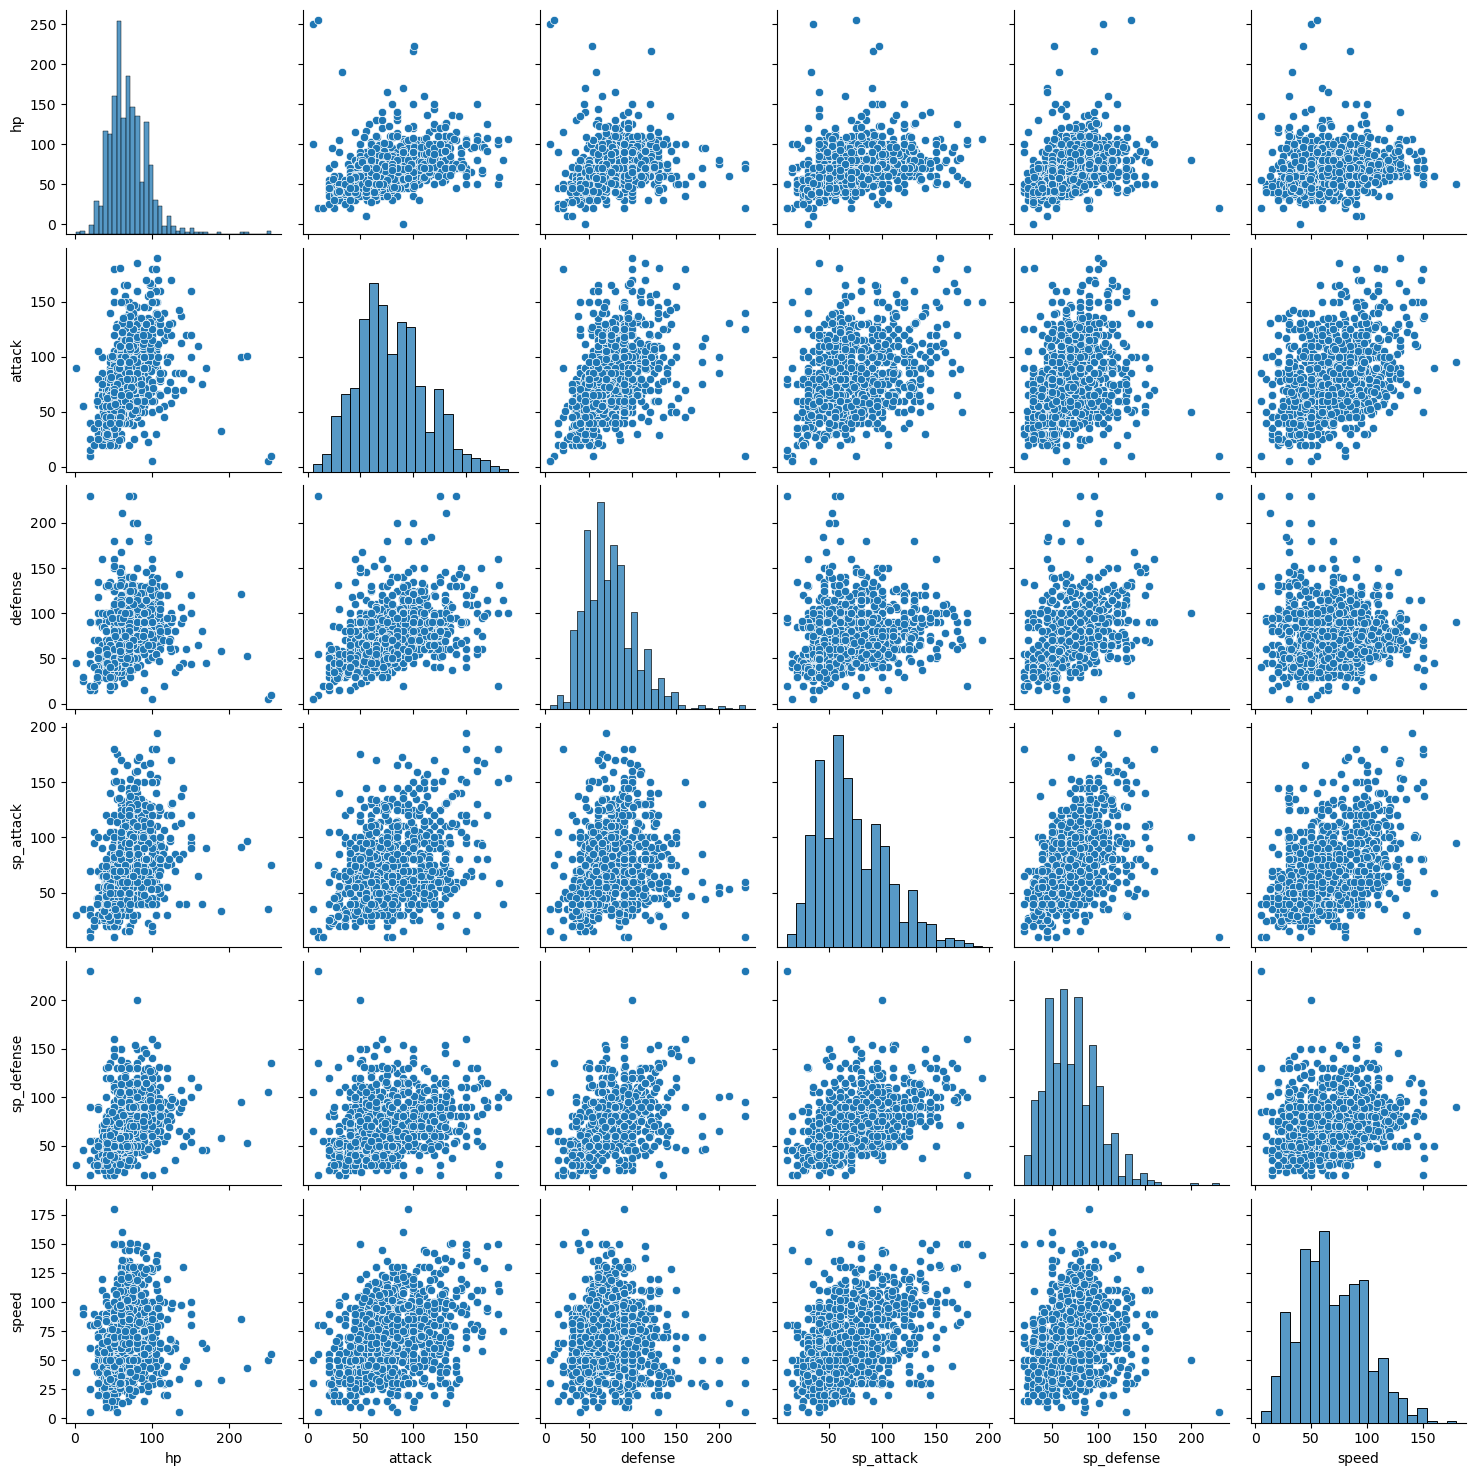

In [8]:
col = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
sns.pairplot(pokedex_df.loc[:,col])

That's interesting! It looks like speed might be correlated with the other stats. Let create a correlation matrix to see. First, a table. We'll use the corr() function from pandas to generate our results. 

In [9]:
pokedex_df.loc[:,col].corr(method='pearson')

,hp,attack,defense,sp_attack,sp_defense,speed
hp,1.000000,0.446889,0.275587,0.367229,0.371427,0.181808
attack,0.446889,1.000000,0.452469,0.375186,0.262777,0.380349
defense,0.275587,0.452469,1.000000,0.223234,0.527019,-0.003275
sp_attack,0.367229,0.375186,0.223234,1.000000,0.512747,0.443044
sp_defense,0.371427,0.262777,0.527019,0.512747,1.000000,0.226699
speed,0.181808,0.380349,-0.003275,0.443044,0.226699,1.000000


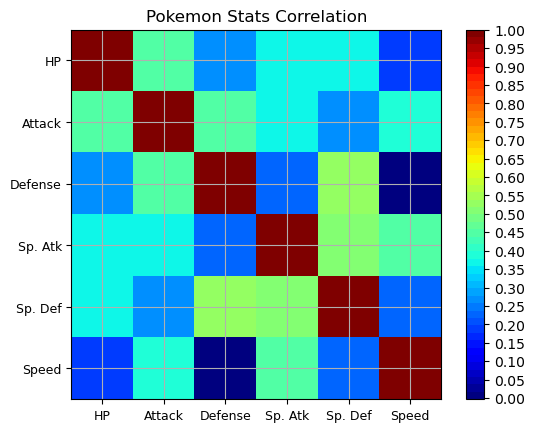

In [10]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Stats Correlation')
    labels=['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()
    
correlation_matrix(pokedex_df.loc[:,col])


Hmm... We were looking for a number greater than |0.75|. There are a few weak realtionships, which are between |0.25| and |0.50| and one barely moderate relationship, which is greater than |0.50| between the special stats. And each of the diagonal cells compare the variables against themselves, so of course they are perfectly correlated and can safely be ignored.  

### Is there a relationship between typings and stats?
Now that we've explored a little bit about the distributions of typings and explored correlations of stats; let's explore how the two variables related. WE'll use a visualization to answer this question. We'll try a radar chart of average stats for each typing.

In [11]:
# create result to store the groupby object created from the pokedex then
# store the result in another variable, only including the pokemon stats
result_df = pokedex_df.groupby('type_1', as_index=False)
type_avg_df = result_df[['hp','attack','defense','sp_attack','sp_defense','speed']].mean()
print(type_avg_df) # print for sanity check

      type_1         hp      attack     defense  sp_attack  sp_defense  \
0        Bug  57.024691   71.074074   71.802469  56.382716   65.074074   
1       Dark  68.818182   81.000000   64.977273  70.454545   66.477273   
2     Dragon  82.375000  107.200000   84.775000  91.525000   84.950000   
3   Electric  62.016949   74.084746   66.728814  89.203390   72.254237   
4      Fairy  72.954545   68.090909   70.545455  78.954545   89.181818   
5   Fighting  71.394737  101.263158   72.210526  56.421053   68.552632   
6       Fire  69.430769   85.400000   68.107692  86.415385   71.292308   
7     Flying  69.625000   75.125000   64.375000  73.875000   70.000000   
8      Ghost  63.868421   72.947368   77.157895  83.868421   79.078947   
9      Grass  66.736264   74.813187   71.824176  75.043956   70.054945   
10    Ground  70.853659   94.121951   85.463415  54.585366   64.317073   
11       Ice  71.500000   76.638889   71.083333  68.666667   71.694444   
12    Normal  77.157895   75.263158   

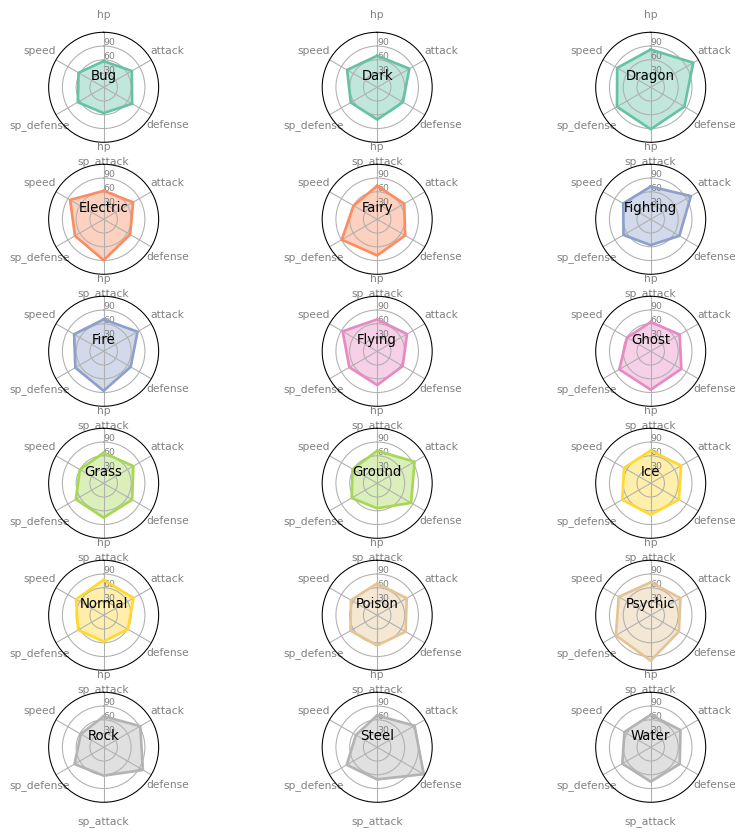

In [12]:
# need to import pi from math for this one bit
from math import pi

# creating the rose radar chart
def make_spider( row, title, color):
    categories=list(type_avg_df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(6,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([30,60,90], ["30","60","90"], color="grey", size=7)
    plt.ylim(0,120)

    # Ind1
    values=type_avg_df.loc[row].drop('type_1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=10, color='black', y=0.5)

# create figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(type_avg_df.index))

# Loop to plot
for row in range(0, len(type_avg_df.index)):
    make_spider( row=row, title=type_avg_df['type_1'][row], color=my_palette(row))

Well! That sure is a radar chart! Could be better. A fun exercise but radar charts aren't great ways to display data and make conclusions anyhow. So let's use a different analysis to better answer the question. The better way would be to use a stem chart to display a single stat at a time. However, instead of doing that, let's collapse all the columns and get the average 'base stat' of each typing. A pokemon's base stat is the sum total of all six of their stats. 

      type_1         hp      attack     defense  sp_attack  sp_defense  \
0        Bug  57.024691   71.074074   71.802469  56.382716   65.074074   
1       Dark  68.818182   81.000000   64.977273  70.454545   66.477273   
2     Dragon  82.375000  107.200000   84.775000  91.525000   84.950000   
3   Electric  62.016949   74.084746   66.728814  89.203390   72.254237   
4      Fairy  72.954545   68.090909   70.545455  78.954545   89.181818   
5   Fighting  71.394737  101.263158   72.210526  56.421053   68.552632   
6       Fire  69.430769   85.400000   68.107692  86.415385   71.292308   
7     Flying  69.625000   75.125000   64.375000  73.875000   70.000000   
8      Ghost  63.868421   72.947368   77.157895  83.868421   79.078947   
9      Grass  66.736264   74.813187   71.824176  75.043956   70.054945   
10    Ground  70.853659   94.121951   85.463415  54.585366   64.317073   
11       Ice  71.500000   76.638889   71.083333  68.666667   71.694444   
12    Normal  77.157895   75.263158   

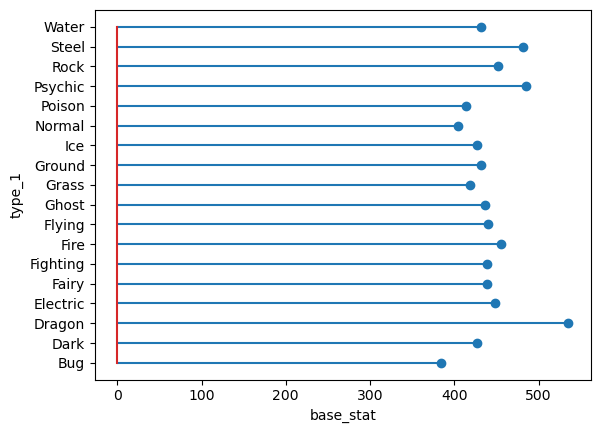

In [13]:
type_avg_df['base_stat'] = type_avg_df[list(type_avg_df.columns)].sum(axis=1)
print(type_avg_df)
# Now let's plot it! 
plt.stem(type_avg_df['base_stat'], orientation='horizontal')
my_range=range(0,len(type_avg_df.index))
plt.yticks(my_range, type_avg_df['type_1'])
plt.xlabel('base_stat')
plt.ylabel('type_1')
plt.show()

## Conlusion
We've set out to answer some simple questions about Pokemon quickly. Some conclusions we found are that there are a lot of water pokemon, not much relationships between the stats themselves, and that Dragons tend to be strong while bugs tend to be weak.